<a href="https://colab.research.google.com/github/he4tnix/multimedia_tasks/blob/main/Proyecto_2/Proyecto_2_ContrerasPatricio_207676861.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Proyecto 2</h2></center>
<center><h3>Procesamiento digital de señales</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Patricio Contreras</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


In [ ]:
from IPython.display import IFrame, display
#filepath = "Proyecto_2_EIE401.pdf"
#IFrame(filepath, width=700, height=400)

En la dirección https://huggingface.co/datasets/astroboy1/metasurfaces_V1_30-90GHZ encontrarás el archivo batch_june2024.zip que contiene las imagenes que usarás para el procesamiento. ATENCION: usa el archivo zip indicado pues tienes las imagenes preparadas para tu trabajo.

## 1. Carga de Datos


- En los archivos, encontrarás un folder con imagenes de 3 categorías: cross, box, circle.
Cada imagen tiene una medida de 512x512 pixeles y 3 canales. Se han acentuado los azules y rojos para facilitar el proceso de obtención de características.

- Puedes extraer la clase a la que pertenece la imagen, desde el nombre del archivo. Ahí mismo encuentras números de serie que te permiten identificar de forma específica una imagen.

- Se te entrega 3 imagenes de referencia de 32x32 pixeles, las que debes usar como plantilla para el proceso de clasificación de la imagen.


In [1]:
!git clone 'https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA.git'
#Extracción de imagenes
!unzip '/content/EIE_401_MULTIMEDIA/Proyectos/Proyecto 2/imagenes.zip'

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: processed512/cross_01_freq_reflect_bb139a98-e549-11ee-944e-047c16a08772_0-125_80-90.png  
  inflating: processed512/box_01_freq_reflect_09a2f2c2-ad7f-11ee-bb2a-047c16a08772_0-84_80-90.png  
  inflating: processed512/cross_01_freq_reflect_e9503ad7-c681-11ee-809f-047c16a08772_0-448_80-90.png  
  inflating: processed512/cross_01_freq_reflect_e9503ad7-c681-11ee-809f-047c16a08772_0-149_80-90.png  
  inflating: processed512/circ_01_freq_reflect_56dee422-b317-11ee-bb58-047c16a08772_0-1263_80-90.png  
  inflating: processed512/cross_01_freq_reflect_3be7fd33-bd16-11ee-be43-047c16a08772_0-1030_80-90.png  
  inflating: processed512/cross_01_freq_reflect_3bb122d5-e627-11ee-9e43-a4c3f0508c4a_0-218_80-90.png  
  inflating: processed512/cross_01_freq_reflect_bb139a98-e549-11ee-944e-047c16a08772_0-618_80-90.png  
  inflating: processed512/cross_01_freq_reflect_3bb122d5-e627-11ee-9e43-a4c3f0508c4a_0-267_80-90.png  
  inflat

## 2. Transformar imagen
Recuerda que la tarea es lograr el procesamiento más rápido posible.
Para lograr esto, realiza las operaciones que consideres necesarias sobre la imagen original para el posterior trabajo de Matching con las plantillas dadas. Crees que trabajar en el dominio de fourier o wavelet ayudaría en las etapas posteriores?

In [2]:
from scipy.fftpack import fft2, ifft2

def fourier_transform_image(image):
    f_transform = fft2(image)
    return f_transform

def inverse_fourier_transform_image(f_transform):
    image_back = ifft2(f_transform)
    return np.abs(image_back)


## 3. Operaciones
Para extraer las caracteristicas, debes realizar las operaciones de segmentación, normalización o convolución como creas necesarias.
El resultado de tus operaciones vas a usarlo para el proceso de matching.


In [3]:
def normalize_image(image):
    return cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

def convolve_image(image, kernel):
    return cv2.filter2D(image, -1, kernel)


## 4. Matching
El proceso de matching debe considerar que vas a usar las imagenes de referencia para calcular la correlación

![image.png](attachment:6850d57c-7e6f-4acf-ac3b-d9a8feb071cb.png)

Este proceso es similar a un windowing, donde la ventana es la imagen de referencia.
Como verás es un proceso iterativo, dispendioso, pero en el que puedes poner tu creatividad a funcionar para lograrlo de forma eficiente.

#### _TIP: realiza el proceso un batch pequeño de imagenes, o solo sobre un par de ellas, hasta que estés satisfecho con el resultado. Una vez esté listo, ESCALA el procedimiento para operar todas la imagenes lo más rápido posible.!_

In [7]:
import numpy as np

# Directorio donde se encuentran las imágenes
image_dir = 'processed512'
# Directorio donde se encuentran las imágenes de referencia
reference_image_dir = 'EIE_401_MULTIMEDIA/Proyectos/Proyecto 2'

# Matching y clasificación
def match_template(image, template):
    if image.dtype != np.uint8:
        image = image.astype(np.uint8)
    if template.dtype != np.uint8:
        template = template.astype(np.uint8)
    result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    return result

def find_best_match(result):
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    return max_loc

# Kernel para convolución
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])


# Cargar imágenes de referencia
reference_images = load_reference_images(reference_image_dir)

# Proceso de matching para una imagen
for class_label, imgs in images.items():
    for filename, img in imgs:
        # Normalizar y convolucionar la imagen
        img_normalized = normalize_image(img)
        img_convolved = convolve_image(img_normalized, kernel)

        # Transformar la imagen al dominio de Fourier
        img_fourier = fourier_transform_image(img_convolved)

        # Matching con las imágenes de referencia
        for ref_filename, ref_img in reference_images:
            ref_img_normalized = normalize_image(ref_img)
            ref_img_convolved = convolve_image(ref_img_normalized, kernel)
            ref_img_fourier = fourier_transform_image(ref_img_convolved)

            # Realizar el matching
            match_result = match_template(img_fourier, ref_img_fourier)
            best_match_loc = find_best_match(match_result)

            print(f"Mejor coincidencia para {filename} con {ref_filename} en {best_match_loc}")


<ipython-input-7-69f53611ee73>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  image = image.astype(np.uint8)
<ipython-input-7-69f53611ee73>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  template = template.astype(np.uint8)


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Mejor coincidencia para cross_01_freq_reflect_3be7fd33-bd16-11ee-be43-047c16a08772_0-805_80-90.png con box_templae.png en (165, 86)
Mejor coincidencia para cross_01_freq_reflect_3be7fd33-bd16-11ee-be43-047c16a08772_0-805_80-90.png con circ_templae.png en (165, 79)
Mejor coincidencia para cross_01_freq_reflect_b1de6052-eca2-11ee-9194-047c16a08772_0-667_80-90.png con cross_templae.png en (44, 353)
Mejor coincidencia para cross_01_freq_reflect_b1de6052-eca2-11ee-9194-047c16a08772_0-667_80-90.png con box_templae.png en (122, 151)
Mejor coincidencia para cross_01_freq_reflect_b1de6052-eca2-11ee-9194-047c16a08772_0-667_80-90.png con circ_templae.png en (89, 144)
Mejor coincidencia para cross_01_freq_reflect_8079ceb8-e14d-11ee-9a7b-047c16a08772_0-175_80-90.png con cross_templae.png en (454, 422)
Mejor coincidencia para cross_01_freq_reflect_8079ceb8-e14d-11ee-9a7b-047c16a08772_0-175_80-90.png con box_templae.png en (248, 82)
M

# 5. Clasificación
De cada operación realizada de matching, obtendrás valores para inferir si la imagen bajo estudio corresponde con alguna de las 3 categorías: cross, box, circle.

Debes almacenar cada resultado obtenido para cada imagen, hallar el error de clasificación y generar un informe del error general al clasificar todas las imagenes.

Presenta aquí el resultado de clasificación numérico, así como  dos ejemplos verdaderos y dos ejemplos falsos de imagenes clasificadas.


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Imagen: box_01_freq_reflect_7262ded2-a81d-11ee-8e0e-047c16a08772_0-857_80-90.png, Clase Real: box, Clase Predicha: cross, Valor de Coincidencia: 0.6399545073509216
Imagen: box_01_freq_reflect_58de4335-0ee6-11ef-b863-047c16a08772_0-73_80-90.png, Clase Real: box, Clase Predicha: cross, Valor de Coincidencia: 0.5538482069969177
Imagen: box_01_freq_reflect_7262ded2-a81d-11ee-8e0e-047c16a08772_0-954_80-90.png, Clase Real: box, Clase Predicha: cross, Valor de Coincidencia: 0.5665919780731201
Imagen: box_01_freq_reflect_2a1a6b92-ea35-11ee-b922-047c16a08772_0-351_80-90.png, Clase Real: box, Clase Predicha: cross, Valor de Coincidencia: 0.6204639077186584
Imagen: box_01_freq_reflect_b6b02fee-a8bb-11ee-8e20-047c16a08772_0-700_80-90.png, Clase Real: box, Clase Predicha: cross, Valor de Coincidencia: 0.556349515914917
Imagen: box_01_freq_reflect_2a1a6b92-ea35-11ee-b922-047c16a08772_0-590_80-90.png, Clase Real: box, Clase Predicha: 

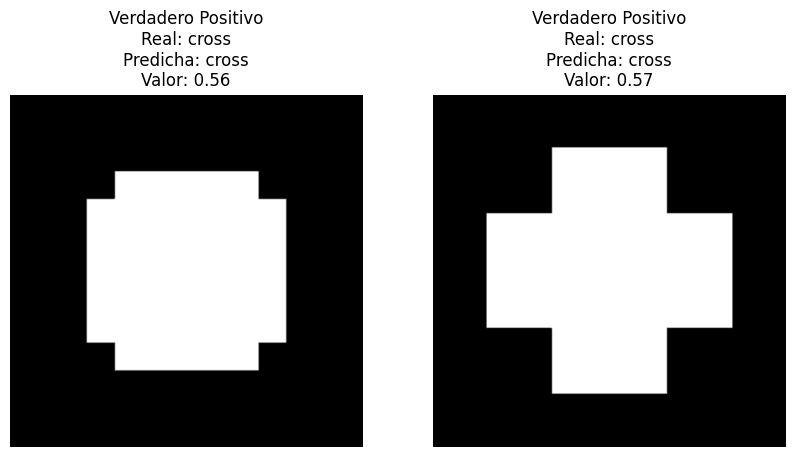


Ejemplos de Falsos Positivos:


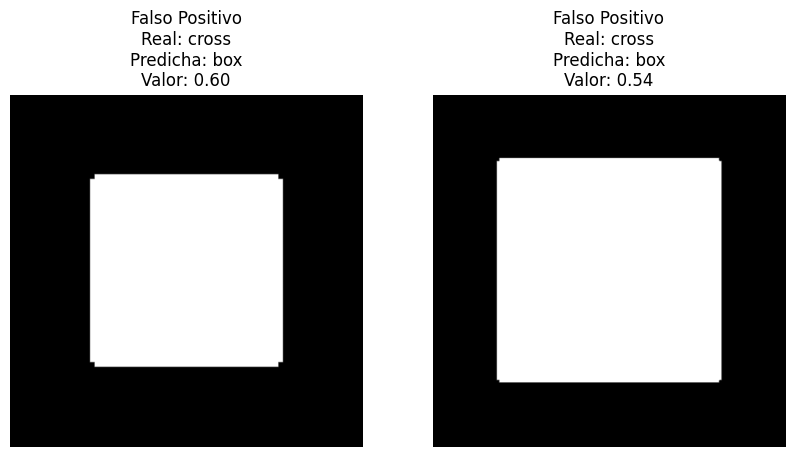

In [4]:
import os
import cv2
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt

# Directorio donde se encuentran las imágenes a clasificar
image_dir = 'processed512'

# Directorio donde se encuentran las imágenes de referencia
reference_image_dir = 'EIE_401_MULTIMEDIA/Proyectos/Proyecto 2'

# Diccionario para almacenar las imágenes y sus clases
images = {'cross': [], 'box': [], 'circle': []}

# Función para cargar imágenes y extraer su clase del nombre del archivo
def load_images(image_dir):
    for filename in os.listdir(image_dir):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            # Extraer la clase del nombre del archivo
            if 'cross' in filename:
                class_label = 'cross'
            elif 'box' in filename:
                class_label = 'box'
            elif 'circ' in filename:
                class_label = 'circle'
            else:
                continue

            # Leer la imagen
            img_path = os.path.join(image_dir, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Verificar si la imagen es de 512x512 píxeles
            if img.shape[:2] == (512, 512):
                # Almacenar la imagen en el diccionario
                images[class_label].append((filename, img))

# Función para cargar imágenes de referencia de 32x32 píxeles
def load_reference_images(reference_image_dir):
    reference_images = []
    for filename in os.listdir(reference_image_dir):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            # Leer la imagen
            img_path = os.path.join(reference_image_dir, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Verificar si la imagen es de 32x32 píxeles
            if img.shape[:2] == (16, 16):
                reference_images.append((filename, img))
    return reference_images

# Cargar las imágenes
load_images(image_dir)

# Cargar las imágenes de referencia
reference_images = load_reference_images(reference_image_dir)

# Funciones de transformación y operaciones
def normalize_image(image):
    return cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

def convolve_image(image, kernel):
    return cv2.filter2D(image, -1, kernel)

# Matching y clasificación
def match_template(image, template):
    result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    return result

def find_best_match(result):
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    return max_loc, max_val

# Kernel de ejemplo para convolución
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

# Almacenar resultados de clasificación
classification_results = []

start = timer()

for class_label, imgs in images.items():
    for filename, img in imgs:
        # Normalizar y convolucionar la imagen
        img_normalized = normalize_image(img)
        img_convolved = convolve_image(img_normalized, kernel)

        best_match_class = None
        best_match_value = -1

        # Matching con las imágenes de referencia
        for ref_filename, ref_img in reference_images:
            ref_img_normalized = normalize_image(ref_img)
            ref_img_convolved = convolve_image(ref_img_normalized, kernel)

            # Realizar el matching
            match_result = match_template(img_convolved, ref_img_convolved)
            match_loc, match_value = find_best_match(match_result)

            if match_value > best_match_value:
                best_match_value = match_value
                best_match_class = ref_filename.split('_')[0]  # Suponiendo que la clase está en el nombre de archivo

        classification_results.append((filename, class_label, best_match_class, best_match_value))

end = timer()
print("Tiempo total de procesamiento:", end - start, "segundos")

# Calcular el error de clasificación
correct_matches = sum(1 for result in classification_results if result[1] == result[2])
total_images = len(classification_results)
accuracy = correct_matches / total_images

print(f"Exactitud de clasificación: {accuracy:.2f}")
print(f"Total de imágenes procesadas: {total_images}")

# Imprimir resultados de clasificación
for result in classification_results:
    print(f"Imagen: {result[0]}, Clase Real: {result[1]}, Clase Predicha: {result[2]}, Valor de Coincidencia: {result[3]}")

# Ejemplos de verdaderos positivos y falsos positivos
true_positives = [res for res in classification_results if res[1] == res[2]]
false_positives = [res for res in classification_results if res[1] != res[2]]

# Función para mostrar ejemplos de imágenes
def show_examples(examples, title, num_examples=2):
    plt.figure(figsize=(10, 5))
    for i, (filename, real_label, predicted_label, match_value) in enumerate(examples[:num_examples]):
        img_path = os.path.join(image_dir, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, num_examples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{title}\nReal: {real_label}\nPredicha: {predicted_label}\nValor: {match_value:.2f}")
        plt.axis('off')
    plt.show()

print("\nEjemplos de Verdaderos Positivos:")
show_examples(true_positives, "Verdadero Positivo")

print("\nEjemplos de Falsos Positivos:")
show_examples(false_positives, "Falso Positivo")


In [5]:

print(f"Exactitud de clasificación: {accuracy:.2f}")
print(f"Total de imágenes procesadas: {total_images}")

Exactitud de clasificación: 0.40
Total de imágenes procesadas: 14328


# 6. Medición
Recuerda que debes imprimir el tiempo que tarda tu algoritmo en procesar todas las imagenes en la base de datos. Usa el siguiente fragmento de código, ubicando el inicio y fin donde corresponda.





In [6]:
print("Tiempo total de procesamiento:", end - start, "segundos")

Tiempo total de procesamiento: 413.2917430970001 segundos
